Clústering de los trayectos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
trackings = pd.read_csv('Trackings_DataFrame_Limpio.csv', sep='\t', encoding='utf-8')
del trackings['Unnamed: 0']

In [3]:
trackings['ageRange'] = trackings['ageRange'].astype('category')
trackings['user_type'] = trackings['user_type'].astype('category')
trackings['idunplug_station'] = trackings['idunplug_station'].astype('category')
trackings['idplug_station'] = trackings['idplug_station'].astype('category')

In [4]:
col_names = list(trackings.columns)
trackings_clustering = trackings[col_names]

In [5]:
trackings.head()

,ageRange,user_type,travel_time,idunplug_station,idplug_station
0,4.0,1.0,169.0,41.0,50.0
1,5.0,1.0,271.0,95.0,90.0
2,4.0,1.0,171.0,15.0,16.0
3,4.0,1.0,388.0,23.0,57.0
4,4.0,1.0,381.0,23.0,43.0


In [6]:
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

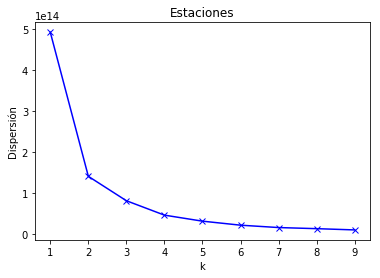

In [7]:
plot_dispersion(trackings_clustering, 'Estaciones')

Parece claro que el número de clústeres adecuado es 3 puesto que el método de la dispersión muestra el principal codo con k=3.Procedemos al ajuste con KMeans. Una vez ajustado el modelo se pueden imprimir las propiedades de los diferentes clústeres.

In [8]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(trackings_clustering)
centroids = kmeans.cluster_centers_

In [9]:
print(centroids)

[[3.30259177e+00 1.20603553e+00 1.04642817e+03 8.75664179e+01
  8.80229272e+01]
 [3.13333333e+00 3.00000000e+00 4.72217740e+06 1.08733333e+02
  8.73333333e+01]
 [3.56410256e+00 3.00000000e+00 1.40979533e+06 1.07923077e+02
  8.99487179e+01]]


Añadimos al DataFrame una columna con el clúster asignado mediante K Means a cada registro de trayecto

In [10]:
labels = kmeans.predict(trackings_clustering)
trackings['cluster'] = labels

In [11]:
trackings.head()

,ageRange,user_type,travel_time,idunplug_station,idplug_station,cluster
0,4.0,1.0,169.0,41.0,50.0,0
1,5.0,1.0,271.0,95.0,90.0,0
2,4.0,1.0,171.0,15.0,16.0,0
3,4.0,1.0,388.0,23.0,57.0,0
4,4.0,1.0,381.0,23.0,43.0,0


Visualizamos tamaños de cada clúster y sus índices asignados y como vemos tenemos un clúster ampliamente generalizado

In [13]:
trackings.index[trackings.cluster==1]

Int64Index([ 336384,  501983,  609588,  734579,  742970,  752216,  784749,
             899687,  916587,  916775,  929947,  939429, 1016325, 1281946,
            1370640],
           dtype='int64')

In [14]:
trackings.index[trackings.cluster==2]

Int64Index([ 142970,  315782,  341051,  387989,  401582,  410421,  415736,
             420304,  421598,  496731,  506984,  507847,  529934,  540696,
             571284,  573900,  573901,  573902,  594760,  603097,  609587,
             631215,  678899,  920258,  923935, 1013031, 1023818, 1033215,
            1106974, 1126177, 1140435, 1140756, 1141078, 1155547, 1161497,
            1167064, 1208963, 1367847, 1404875],
           dtype='int64')

 Como podemos observar , la inmensa mayoría de registros pertenecen al clúster 0 (1411509/15/39 registros)

In [25]:
trackings.travel_time.groupby(trackings.cluster).mean()

cluster
0    1.046428e+03
1    4.722177e+06
2    1.409795e+06
Name: travel_time, dtype: float64

In [28]:
trackings.travel_time.groupby(trackings.cluster).std()

cluster
0    4.004624e+03
1    1.782898e+06
2    5.918824e+05
Name: travel_time, dtype: float64

In [30]:
from scipy import stats 
trackings.groupby(trackings.cluster).describe()


travel_time                                                    \
              count          mean           std        min        25%   
cluster                                                                 
0         1411509.0  1.046428e+03  4.004624e+03        0.0      423.0   
1              15.0  4.722177e+06  1.782898e+06  3289066.0  3691572.0   
2              39.0  1.409795e+06  5.918824e+05   755525.0   995411.5   

                                          
               50%        75%        max  
cluster                                   
0            660.0     1026.0   690053.0  
1        4028406.0  5086921.5  9755123.0  
2        1192299.0  1766744.0  2772393.0

Observamos que en el clúster 1 la media de tiempo de viaje es muy superior a los otros clústeres pero con desviación típica muy superior , posiblemente influenciado por tener muy pocos registros comparativamente con el clúster 0 , por lo que esa dispersión queda más patente

In [35]:
trackings.corr()

,travel_time,cluster
travel_time,1.000000,0.622855
cluster,0.622855,1.000000


Si analizamos la correlación entre clúster y tiempo de viaje es de 0,62 por lo que el coeficiente R^2 sería de 0,38 , por lo que el tiempo de viaje explicaría en un 38% la variabilidad de clúster .

In [51]:
pd.crosstab(index=trackings['user_type'],
            columns=trackings['cluster'], margins=True)

cluster,0,1,2,All
user_type,,,,
0.0,41004,0,0,41004
1.0,1195013,0,0,1195013
2.0,19159,0,0,19159
3.0,156333,15,39,156387
All,1411509,15,39,1411563


In [59]:
pd.crosstab(index=trackings['user_type'], columns=trackings['cluster']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

cluster,0,1,2
user_type,,,
0.0,2.904976,0.0,0.0
1.0,84.662089,0.0,0.0
2.0,1.357342,0.0,0.0
3.0,11.075594,100.0,100.0


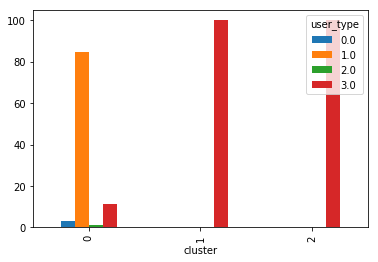

In [57]:
plot = pd.crosstab(index=trackings['cluster'],
            columns=trackings['user_type']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Si cruzamos los diferentes clústeres con el tipo de usuario podemos observar que en los clústeres 2 y 3 el único tipo de usuario presente es el 3 (trabajador de la empresa) , mientras que en el clúster 0 predomina el tipo de usuario 1 (usuario abonado anual)

In [52]:
pd.crosstab(index=trackings['ageRange'],
            columns=trackings['cluster'], margins=True)

cluster,0,1,2,All
ageRange,,,,
0.0,236776,3,0,236779
1.0,37654,1,7,37662
2.0,23140,0,0,23140
3.0,176475,1,3,176479
4.0,645952,7,22,645981
5.0,284601,3,7,284611
6.0,6911,0,0,6911
All,1411509,15,39,1411563


In [61]:
pd.crosstab(index=trackings['ageRange'], columns=trackings['cluster']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

cluster,0,1,2
ageRange,,,
0.0,16.774672,20.000000,0.000000
1.0,2.667642,6.666667,17.948718
2.0,1.639380,0.000000,0.000000
3.0,12.502577,6.666667,7.692308
4.0,45.763222,46.666667,56.410256
5.0,20.162890,20.000000,17.948718
6.0,0.489618,0.000000,0.000000


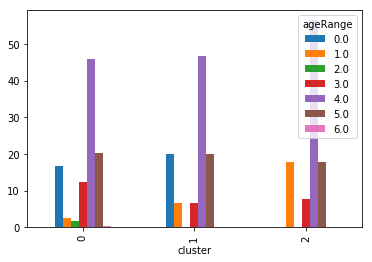

In [58]:
plot = pd.crosstab(index=trackings['cluster'],
            columns=trackings['ageRange']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Si cruzamos los diferentes clústeres con los rangos de edad de los usuarios podemos observar que en los 3 clústeres predomina el usuario de tipo 4 (entre 27 y 40 años ), seguido de los usuarios de tipo 5 (entre 41 y 65 años )

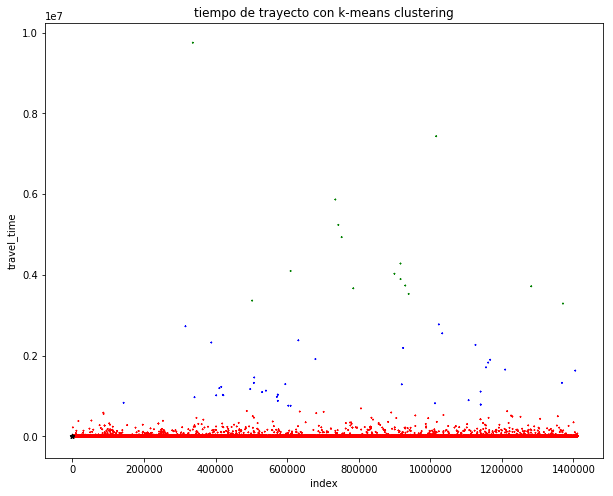

In [68]:
colores=['red','green','blue']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.figure(figsize=(10, 8))        
plt.scatter(trackings.index, trackings.travel_time, c=asignar, s=1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('index')
plt.ylabel('travel_time')
plt.title('tiempo de trayecto con k-means clustering')
plt.show()

Con este gráfico podemos observar lo anteriormente comentado , el clúster 1 (y en menor medida el 2) se corresponden con registros con mucho mayor tiempo de viaje .

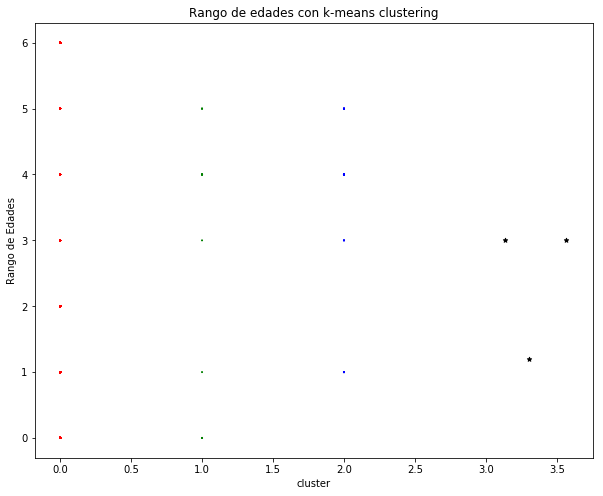

In [53]:
colores=['red','green','blue']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.figure(figsize=(10, 8))        
plt.scatter(trackings.cluster, trackings.ageRange, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('cluster')
plt.ylabel('Rango de Edades')
plt.title('Rango de edades con k-means clustering')
plt.show()

Como podemos ver el rango de edades de los usuarios no parece ser definitivo en la segmentación en clústeres como habíamos visto anteriormente .

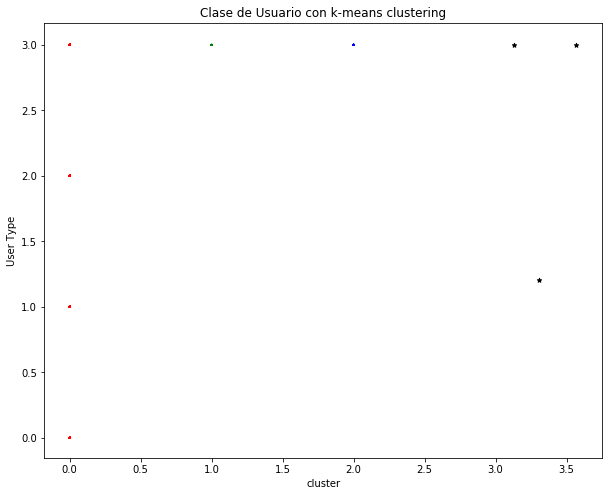

In [54]:
colores=['red','green','blue']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.figure(figsize=(10, 8))        
plt.scatter(trackings.cluster, trackings.user_type, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('cluster')
plt.ylabel('User Type')
plt.title('Clase de Usuario con k-means clustering')
plt.show()

En este gráfico podemos observar lo anteriormente visto , en los clústeres 1 y 2 el tipo de usuario corresponde a usuarios de tipo 3 ( empleados de la empresa )

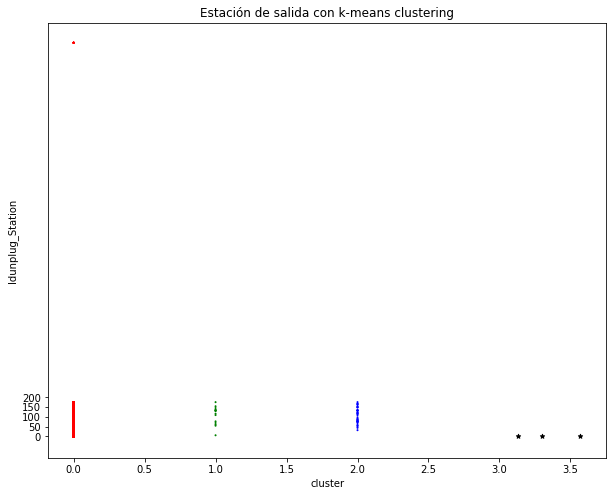

In [67]:
colores=['red','green','blue']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.figure(figsize=(10, 8))
plt.yticks([0, 50, 100, 150,200])
plt.scatter(trackings.cluster, trackings.idunplug_station, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('cluster')
plt.ylabel('Idunplug_Station')
plt.title('Estación de salida con k-means clustering')
plt.show()

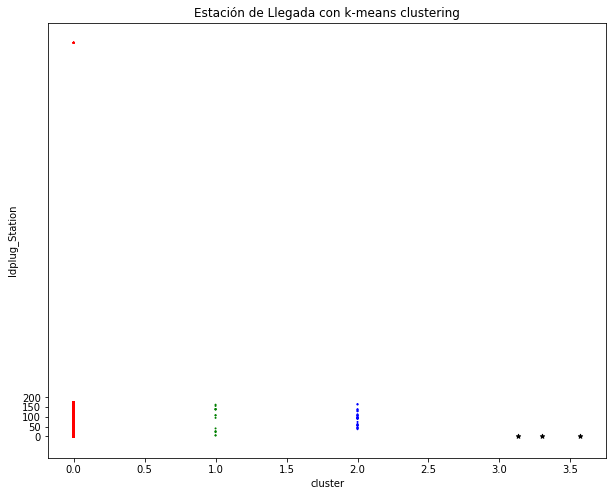

In [66]:
colores=['red','green','blue']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.figure(figsize=(10, 8)) 
plt.yticks([0, 50, 100, 150,200])
plt.scatter(trackings.cluster, trackings.idplug_station, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('cluster')
plt.ylabel('Idplug_Station')
plt.title('Estación de Llegada con k-means clustering')
plt.show()

En cuanto a las estaciones , podemos ver que en los tres clústeres aparecen de manera bastante uniforme todas las estaciones tanto de salida como de llegada de recorridos .